In [15]:
import re
import pandas as pd
import numpy as np
import string
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

from datetime import datetime
from langdetect import detect
from language_detector import detect_language

import pickle 
import pyLDAvis
import pyLDAvis.gensim

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm

import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from pprint import pprint

from tqdm import tqdm_notebook as tqdm_note
import tqdm


import warnings
warnings.filterwarnings('ignore')

# Import the document list

In [16]:
#import the doc_list file
#load the pickle 
filename= 'doc_spacyall'
infile= open(filename,'rb')
load_doc_spacyall = pickle.load(infile)
infile.close()

In [17]:
#import the doc_list file - spacy english list 
#load the pickle 
filename= 'doc_spacyen'
infile= open(filename,'rb')
load_doc_spacyen = pickle.load(infile)
infile.close()

In [18]:
#import the doc_list file
#load the pickle 
filename= 'doc_nltk_bitri'
infile= open(filename,'rb')
load_doc_nltk_bitri = pickle.load(infile)
infile.close()

In [19]:
#import the doc_list file - nltk bigram/trigram english list 
#load the pickle 
filename= 'doc_nltk_en'
infile= open(filename,'rb')
load_doc_nltk_en = pickle.load(infile)
infile.close()

In [20]:
#import the doc_list file
#load the pickle 
filename= 'doc_clean_tweet'
infile= open(filename,'rb')
load_doc_clean_tweet = pickle.load(infile)
infile.close()

In [21]:
#import the doc_list file
#load the pickle 
filename= 'doc_clean_tweet_en'
infile= open(filename,'rb')
load_doc_clean_tweet_en = pickle.load(infile)
infile.close()

#### Cautions : This notebook takes a long time to Run. Thus I will not restart the kernel   

According to the result from the previous notebook `3.coherence score and grid search`, I will first set 4 topics, alpha is auto and beta is none for each input. 

# Buliding Latent Dirichlet Allocation model (LDA) 

__Brief intorduction of LDA and how it works :__

LDA is a type of statistical language models used for uncovering hidden structure in a collection of texts. It is an unsupervised learning. 

With the help of gensim library, we will basically only have to set the k we are deciding up front on a preset number of topics to determine and number of time (represent as n in the function below)of iterative procedure

Words are assigned randomly to topics at first. As we iterate through each word in our corpus and (re)assign it to a topic:

- Words become more common in topics where they are already common.
- Topics will become more common in documents where they are already common.

As words are found to be consistently distributed within topics, the model achieves a sort of equilibrium based on the distribution of words accross all documents.

In [22]:
#Function for LDA model, 
#pass the corpus with different pre-proccessing, number of topics, and number of iterition(passes)

def lda_model_func (filename, k, n):
    
    lda_model = gensim.models.ldamodel.LdaModel(corpus=filename,
                                               id2word=words,
                                               num_topics=k, 
                                               random_state=100,
                                               update_every=1,
                                               passes=n,
                                               alpha='auto',
                                               per_word_topics=True)
    pprint(lda_model.print_topics(num_words=10))
    

## First LDA Modelling - with Spacy Pre-processing ¶

### Data Transformation: Corpus and Dictionary

In [23]:
# a mapping between words and their integer ids - input 1 load_doc_spacyall
#https://radimrehurek.com/gensim/corpora/dictionary.html
words = corpora.Dictionary(load_doc_spacyall)

# Turns each document into a bag of words - input 1 load_doc_spacyall
amazon_corpus_spacyall = [words.doc2bow(doc) for doc in load_doc_spacyall]

In [24]:
lda_model_spacy = lda_model_func(amazon_corpus_spacyall,4,10)

[(0,
  '0.056*"order" + 0.040*"delivery" + 0.035*"day" + 0.030*"deliver" + '
  '0.025*"thank" + 0.024*"prime" + 0.022*"item" + 0.020*"today" + '
  '0.019*"package" + 0.012*"arrive"'),
 (1,
  '0.024*"time" + 0.022*"customer" + 0.020*"email" + 0.018*"service" + '
  '0.017*"help" + 0.015*"tell" + 0.013*"send" + 0.013*"refund" + '
  '0.013*"receive" + 0.012*"wait"'),
 (2,
  '0.019*"deal" + 0.018*"november" + 0.015*"lie" + 0.012*"house" + 0.010*"big" '
  '+ 0.009*"click" + 0.009*"shipment" + 0.009*"original" + 0.007*"concern" + '
  '0.007*"joke"'),
 (3,
  '0.019*"de" + 0.015*"que" + 0.010*"el" + 0.009*"la" + 0.008*"por" + '
  '0.008*"en" + 0.008*"es" + 0.007*"un" + 0.007*"wednesday" + '
  '0.007*"thursday"')]


In [25]:
# for the second output english list only 
words = corpora.Dictionary(load_doc_spacyen)

# Turns each document into a bag of words - input 1 load_doc_spacyen
amazon_corpus_spacyen = [words.doc2bow(doc) for doc in load_doc_spacyen]

In [26]:
lda_model_spacy = lda_model_func(amazon_corpus_spacyen,4,10)

[(0,
  '0.035*"email" + 0.028*"tell" + 0.023*"receive" + 0.023*"send" + '
  '0.023*"wait" + 0.022*"account" + 0.022*"need" + 0.021*"contact" + '
  '0.017*"arrive" + 0.017*"yes"'),
 (1,
  '0.059*"order" + 0.044*"delivery" + 0.038*"day" + 0.032*"deliver" + '
  '0.031*"time" + 0.028*"customer" + 0.026*"prime" + 0.024*"item" + '
  '0.023*"service" + 0.021*"today"'),
 (2,
  '0.041*"thank" + 0.033*"help" + 0.023*"issue" + 0.022*"try" + 0.020*"use" + '
  '0.017*"like" + 0.017*"phone" + 0.016*"work" + 0.014*"leave" + '
  '0.013*"problem"'),
 (3,
  '0.042*"product" + 0.032*"return" + 0.026*"buy" + 0.019*"seller" + '
  '0.018*"purchase" + 0.015*"price" + 0.014*"box" + 0.013*"replacement" + '
  '0.013*"sell" + 0.012*"company"')]


In [27]:
#test the new corpus amazon_corpus_spacyen which contain only english tweets with the best hyperparameter. 
lda_model_gridsearch = gensim.models.LdaMulticore(corpus=amazon_corpus_spacyen,
                                           id2word=words,
                                           num_topics=4, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           eta=0.7000000000000001)
pprint(lda_model_gridsearch.print_topics(num_words=10))

[(0,
  '0.063*"order" + 0.047*"delivery" + 0.037*"day" + 0.034*"deliver" + '
  '0.027*"prime" + 0.024*"today" + 0.023*"package" + 0.022*"item" + '
  '0.016*"wait" + 0.014*"arrive"'),
 (1,
  '0.039*"customer" + 0.032*"service" + 0.025*"time" + 0.015*"issue" + '
  '0.015*"guy" + 0.011*"help" + 0.011*"contact" + 0.010*"response" + '
  '0.010*"know" + 0.010*"chat"'),
 (2,
  '0.039*"thank" + 0.015*"work" + 0.015*"try" + 0.013*"account" + '
  '0.013*"leave" + 0.011*"use" + 0.010*"card" + 0.010*"help" + 0.009*"like" + '
  '0.009*"app"'),
 (3,
  '0.034*"email" + 0.030*"send" + 0.025*"product" + 0.019*"return" + '
  '0.016*"refund" + 0.015*"number" + 0.015*"link" + 0.014*"detail" + '
  '0.013*"receive" + 0.013*"account"')]


__Short summary:__

I run LDA for 2 inputs : 
1. `amazon_corpus_spacyall` , the corpus with some non english tweet such as German, Spanish 
2. `amazon_corpus_spacyen` , the corpus with the english tweets only

We can see that the first outcome still contains some foreign words like *"de","que" ,"el","la","por","en","es","un"* 
The second LDA with amazon_corpus_spacyen is making more sense. I can infer into Topics accordingly. 
For example, we have topic0 : account issue - follow up by email , topic1: order delivery -prime account, topic2:issue request phone call,
topic3: product return or replacement

As I do the grid seach based on only one input load_doc_spacyall and the the running time takes long time, , I will only test the new corpus `amazon_corpus_spacyen` which contain only english tweets with the best hyperparameter. 
However we can see that the outcome is not ideal. Words like *"de","que","novemb","la","el","por","en","lo","un

## Second LDA Modelling - with NLTK and Bigram/Trigram Pre-processing ¶

### Data Transformation: Corpus and Dictionary

In [28]:
# a mapping between words and their integer ids -input 2 load_doc_nltk_bitri
words = corpora.Dictionary(load_doc_nltk_bitri)

# Turns each document into a bag of words - input 2 load_doc_nltk_bitri
amazon_corpus_nltk_bitri = [words.doc2bow(doc) for doc in load_doc_nltk_bitri]

In [29]:
lda_model_nltk= lda_model_func(amazon_corpus_nltk_bitri,4,10)

[(0,
  '0.043*"send" + 0.025*"work" + 0.021*"leave" + 0.021*"link" + '
  '0.018*"someone" + 0.017*"app" + 0.014*"driver" + 0.012*"box" + 0.010*"page" '
  '+ 0.010*"home"'),
 (1,
  '0.062*"customer" + 0.052*"service" + 0.018*"detail" + 0.017*"really" + '
  '0.015*"support" + 0.014*"people" + 0.014*"team" + 0.014*"care" + '
  '0.014*"provide" + 0.011*"bad"'),
 (2,
  '0.056*"account" + 0.017*"soon" + 0.016*"possible" + 0.014*"monday" + '
  '0.012*"info" + 0.010*"reach" + 0.010*"nov" + 0.010*"hold" + 0.009*"access" '
  '+ 0.008*"bank"'),
 (3,
  '0.033*"order" + 0.028*"get" + 0.024*"delivery" + 0.022*"say" + '
  '0.018*"deliver" + 0.017*"time" + 0.014*"prime" + 0.014*"email" + '
  '0.013*"item" + 0.012*"call"')]


In [30]:
#for the output of english list 
words = corpora.Dictionary(load_doc_nltk_en)

# Turns each document into a bag of words - input load_doc_nltk_en
amazon_corpus_nltk_en = [words.doc2bow(doc) for doc in load_doc_nltk_en]

In [31]:
lda_model_nltk= lda_model_func(amazon_corpus_nltk_en,4,10)

[(0,
  '0.034*"time" + 0.031*"customer" + 0.027*"email" + 0.026*"service" + '
  '0.025*"call" + 0.018*"send" + 0.017*"account" + 0.017*"issue" + '
  '0.016*"contact" + 0.016*"already"'),
 (1,
  '0.048*"order" + 0.035*"delivery" + 0.035*"get" + 0.032*"say" + '
  '0.026*"deliver" + 0.021*"prime" + 0.019*"item" + 0.017*"package" + '
  '0.017*"go" + 0.016*"would"'),
 (2,
  '0.021*"bad" + 0.015*"year" + 0.014*"membership" + 0.013*"fail" + '
  '0.013*"experience" + 0.012*"question" + 0.011*"logistic" + 0.011*"second" + '
  '0.010*"helpful" + 0.009*"ever"'),
 (3,
  '0.042*"refund" + 0.035*"product" + 0.026*"return" + 0.021*"money" + '
  '0.021*"buy" + 0.017*"people" + 0.014*"charge" + 0.014*"purchase" + '
  '0.012*"chat" + 0.012*"price"')]


__Short summary:__

I run LDA for 2 inputs for the output of NLTK and Bigram/Trigram Pre-processing: 
1. `amazon_corpus_nltk_bitri` , the corpus with some non english tweet such as German, Spanish 
2. `amazon_corpus_nltk_en`, the corpus with the english tweets only

Both of the result didn't contain any non english words. And both are sufficient to provide insight for naming the topics
I will prefer the second result with `amazon_corpus_nltk_en`, the topics are quite similar to the previous result of `amazon_corpus_spacyen`


# Third LDA Modelling - with process tweet function and TweetTokenizer Pre-processing ¶

### Data Transformation: Corpus and Dictionary

In [32]:
# a mapping between words and their integer ids - input 3 load_doc_clean_tweet
words = corpora.Dictionary(load_doc_clean_tweet)

# Turns each document into a bag of words - input 3 load_doc_clean_tweet
amazon_corpus_clean_tweet = [words.doc2bow(doc) for doc in load_doc_clean_tweet]

In [33]:
lda_model_tweet = lda_model_func(amazon_corpus_clean_tweet,4,10)

[(0,
  '0.030*"noth" + 0.022*"carrier" + 0.018*"driver" + 0.016*"up" + 0.015*"help" '
  '+ 0.013*"dm" + 0.011*"usp" + 0.010*"great" + 0.008*"turn" + '
  '0.008*"wednesday"'),
 (1,
  '0.024*"de" + 0.019*"que" + 0.014*"novemb" + 0.013*"la" + 0.012*"el" + '
  '0.011*"stock" + 0.010*"por" + 0.010*"en" + 0.009*"lo" + 0.008*"un"'),
 (2,
  '0.047*"email" + 0.026*"alreadi" + 0.026*"custom" + 0.023*"account" + '
  '0.019*"pleas" + 0.019*"sent" + 0.018*"repli" + 0.016*"check" + '
  '0.016*"respons" + 0.015*"link"'),
 (3,
  '0.028*"order" + 0.020*"deliveri" + 0.015*"deliv" + 0.014*"time" + '
  '0.012*"prime" + 0.011*"item" + 0.011*"servic" + 0.010*"call" + '
  '0.010*"packag" + 0.010*"one"')]


In [34]:
# a mapping between words and their integer ids - input 3 load_doc_clean_tweet_en
words = corpora.Dictionary(load_doc_clean_tweet_en)

# Turns each document into a bag of words - input 3 load_doc_clean_tweet_en
amazon_corpus_clean_tweet_en = [words.doc2bow(doc) for doc in load_doc_clean_tweet_en]

In [35]:
lda_model_tweet = lda_model_func(amazon_corpus_clean_tweet_en,4,10)

[(0,
  '0.054*"order" + 0.039*"deliveri" + 0.029*"deliv" + 0.024*"time" + '
  '0.023*"prime" + 0.021*"item" + 0.020*"packag" + 0.019*"one" + 0.018*"say" + '
  '0.017*"still"'),
 (1,
  '0.040*"pay" + 0.030*"card" + 0.025*"charg" + 0.022*"gift" + 0.022*"price" + '
  '0.017*"novemb" + 0.015*"membership" + 0.014*"free" + 0.013*"credit" + '
  '0.010*"bank"'),
 (2,
  '0.054*"custom" + 0.044*"servic" + 0.043*"call" + 0.018*"guy" + '
  '0.017*"product" + 0.016*"money" + 0.016*"give" + 0.016*"make" + '
  '0.015*"realli" + 0.013*"support"'),
 (3,
  '0.022*"email" + 0.015*"thank" + 0.015*"refund" + 0.014*"account" + '
  '0.014*"pleas" + 0.013*"issu" + 0.013*"contact" + 0.012*"alreadi" + '
  '0.010*"like" + 0.010*"phone"')]


__Short summary:__

I run LDA for 2 inputs : 
1. `amazon_corpus_clean_tweet` , the corpus with some non english tweet such as German, Spanish 
2. `amazon_corpus_clean_tweet_en` , the corpus with the english tweets only

Similar to the spacy corpur, we can see that the first outcome still contains some foreign words like *"de","que" ,"el","la","por","un"* 
The second LDA with amazon_corpus_spacyen is making more sense. I can infer into Topics accordingly. 
For example, we have topic0 : account issue - follow up by email , topic1: order delivery -prime account, topic2:issue request phone call,
topic3: product return or replacement

### Overall summary:

From all of the results above, I have the following observations:

Firstly, delivery - with Prime account appeares as result everytime. I believe this is the most frequent topic.

Secondly, the LDA result after I filter out the non English tweets are better than the one with non English tweets.


For the final model, I decide that the `amazon_corpus_nltk_en` with the pre-processing nltk and bigram/trigram makes more sense. I can related to the following topic names:

Topic 0 : account issue - email follow up

Topic 1 : delivery - with Prime account

Topic 2 : membership and compliant

Topic 3 : refund and product return


## Final model 

### Data Transformation: Corpus and Dictionary

In [36]:
#for the output of english list 
words = corpora.Dictionary(load_doc_nltk_en)

# Turns each document into a bag of words - input load_doc_nltk_en
amazon_corpus_nltk_en = [words.doc2bow(doc) for doc in load_doc_nltk_en]

In [37]:
lda_model_final = gensim.models.ldamodel.LdaModel(corpus=amazon_corpus_nltk_en,
                                               id2word=words,
                                               num_topics=4, 
                                               random_state=100,
                                               update_every=1,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)

In [38]:
pprint(lda_model_final.print_topics(num_words=10))


[(0,
  '0.034*"time" + 0.031*"customer" + 0.027*"email" + 0.026*"service" + '
  '0.025*"call" + 0.018*"send" + 0.017*"account" + 0.017*"issue" + '
  '0.016*"contact" + 0.016*"already"'),
 (1,
  '0.048*"order" + 0.035*"delivery" + 0.035*"get" + 0.032*"say" + '
  '0.026*"deliver" + 0.021*"prime" + 0.019*"item" + 0.017*"package" + '
  '0.017*"go" + 0.016*"would"'),
 (2,
  '0.021*"bad" + 0.015*"year" + 0.014*"membership" + 0.013*"fail" + '
  '0.013*"experience" + 0.012*"question" + 0.011*"logistic" + 0.011*"second" + '
  '0.010*"helpful" + 0.009*"ever"'),
 (3,
  '0.042*"refund" + 0.035*"product" + 0.026*"return" + 0.021*"money" + '
  '0.021*"buy" + 0.017*"people" + 0.014*"charge" + 0.014*"purchase" + '
  '0.012*"chat" + 0.012*"price"')]


### Viusalize the Final LDA model 

In [39]:
#define the stopwords for plotting wordcloud
stopwords_new2 =['amazonhelp','amazon','day','thank','help','today','tell','need','want',
                'try','know','guy','yes','use','get','say','go','would','take','back']

stopwords_en = stopwords.words('english')
stopwords_en.extend(stopwords_new2)


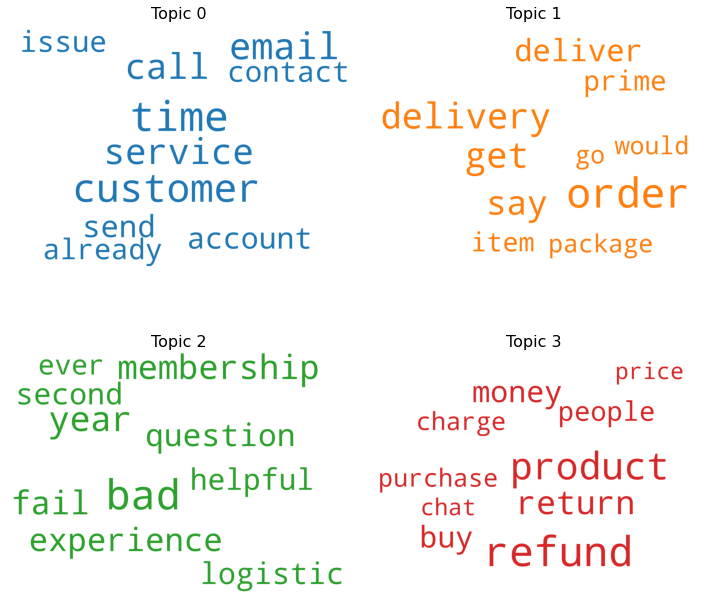

In [40]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

stopwords_en = stopwords.words('english')
stopwords_en.extend(stopwords_new2)

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords_en,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_final.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [41]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_final,amazon_corpus_nltk_en,words)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.264792 -0.283323       1        1  43.579899
0      0.207443  0.318355       2        1  34.209373
3     -0.245289 -0.056186       3        1  13.866366
2     -0.226946  0.021154       4        1   8.344356, topic_info=               Term          Freq         Total Category  logprob  loglift
65            order  13484.000000  13484.000000  Default  30.0000  30.0000
121        delivery   9839.000000   9839.000000  Default  29.0000  29.0000
114            time   7549.000000   7549.000000  Default  28.0000  28.0000
130             say   9010.000000   9010.000000  Default  27.0000  27.0000
291          refund   3704.000000   3704.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
982      completely    267.448761    268.132690   Topic4  -5.2989   2.4810
878          select    267.679382    268.367126   Topic4  -5.2980   2.4810
964            fuck    261.220276    261.900787   Topic4  -5.3225   2.4810
271            hard    264.282990    264.972900   Topic4  -5.3108   2.4810
1168  unfortunately    262.307343    262.999939   Topic4  -5.3183   2.4809

[177 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
179       2  0.999935    account
484       3  0.999584        add
140       1  0.998905    address
140       2  0.000629    address
90        2  0.999717    already
...     ...       ...        ...
154       3  0.002171       work
147       1  0.999742      would
164       4  0.999491       year
46        1  0.999485  yesterday
71        1  0.999832        yet

[175 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

The above Intertopic Distance Plot help us to have a better understanding of the relationships between the topics.

## Conclusion and Recommendation 

LDA helped to categorize 4 main topics, they are inferred to be :

Topic 0 : account issue - email follow up

Topic 1 : delivery - with Prime account

Topic 2 : membership and complaint

Topic 3 : refund and product return

__Recommendation :__
To restructure the customer support team into sub team based on these 3 topics.
For example, we can have a sub team dealing with account issue. The second team will be responsible for Prime account. The third team will be dealing with compliant. The forth team is in charge for refund and product return. 
And the peak season is in Oct, Nov and Dec, be aware of the allocation of staffs and the SLA.


## Limitation and Improvement

The outcome topics are not satifiying when I run the first LDA models as there are topics overlapping and words result from one of the topics are meaningless. I realize it is because I decided tp keep the German,Spanish tweets. 

We can see the impact of the non english tweets such as Spanish and German tweets shown on Topic 1. The words are more likely in German, Spanish or French. I made a wrong judgement of keep them in the first place. 

I decide to go back to my notebook `2.explore amazon-EDA & data cleaning` to filter out the non English tweets and add 3 more new pickle files.
Then I load the pickles file here and transform them as corpus. I rerun LDA with these 3 new cropus without any non English tweets 

The trade off is some tweets are actually English tweets but was mis-dectected as non English. I may lose some information. The language detection seems not quite accurate when dealing with large data. Comparing the result of the first LDA and the rerun LDA, the result of rerun LDA with non English tweet corpus obviously provide a better insight, it is more satisfying.

Besides, examining tweets is challenging as it only has a short length of converstaion. And because of the business nature of Amazone is e-commerce. It seems that most of the requests are related to order delivery. 

Lastly, the coherence score are low. The highest are 0.44 after tunning. Also the hyperparameters setting is not able to provide the best outcome of LDA. In this part, it is definitely that I could have done better.

## Future Work

For future work, I would like to do the following : 
1. Emoji analysis 
2. Sentiment analysis - to understand the painpoint and to enhance 
3. Classification - to have predict of the request topics so to have a forcast of workforce allocation 